<a href="https://colab.research.google.com/github/iveksl2/ds_skills/blob/statistical_inference_class/math_and_stats/Random_Variation_and_Power_Analysis_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulate One Group**

Loading required package: ggplot2



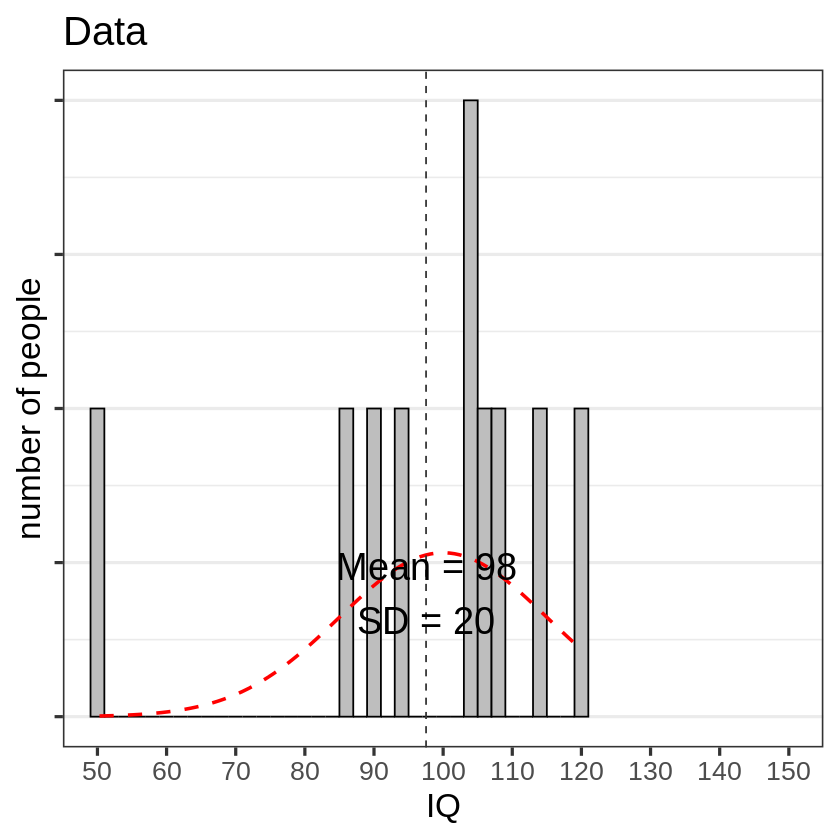

In [1]:
#load or install ggplot package
if(!require(ggplot2)){install.packages('ggplot2')}
library(ggplot2)

#Simulate one group
n=10 #set sample size
x<-rnorm(n = n, mean = 100, sd = 15) #create sample from normal distribution


#plot data
ggplot(as.data.frame(x), aes(x))  + 
  geom_histogram(colour="black", fill="grey", aes(y=..density..), binwidth=2) +
  stat_function(fun=dnorm, args=c(mean=100,sd=15), size=1, color="red", lty=2) +
  #  geom_density(fill=NA, colour="black", size = 1) +
  xlab("IQ") + ylab("number of people")  + ggtitle("Data") + theme_bw(base_size=20) + 
  theme(panel.grid.major.x = element_blank(), axis.text.y = element_blank(), panel.grid.minor.x = element_blank()) + 
  geom_vline(xintercept=mean(x), colour="gray20", linetype="dashed") + 
  coord_cartesian(xlim=c(50,150)) + scale_x_continuous(breaks=c(50,60,70,80,90,100,110,120,130,140,150)) +
  annotate("text", x = mean(x), y = 0.02, label = paste("Mean = ",round(mean(x)),"\n","SD = ",round(sd(x)),sep=""), size=8)

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

**March of the P Values**

In [ ]:
#to get emoticons for each test, set wait to 1 and showfaces to 1. 
#When running large number of simulations, se wait to 0 and showfaces to 0.
options(scipen=20) #disable scientific notation for numbers
waitx<-0.5 #To see a small wait between individual trials, set a wait time to e.g., 0.5 
showfaces<-1 #Set to 0 if you do not want the faces, set to 1 if you want to see the faces

nSims <- 100 #number of simulated experiments (for large numbers, set wait to 0 and showfaces to 0)
n<-50 #sample size in each group

#set up some variables
p<-numeric(nSims) 

for(i in 1:nSims){ #for each simulated experiment
  x<-rnorm(n = n, mean = 100, sd = 15) #produce N simulated participants
  y<-rnorm(n = n, mean = 106, sd = 15) #produce N simulated participants
  z<-t.test(x,y) #perform the t-test
  p[i]<-z$p.value #get the p-value and store it
  if(z$p.value < 0.001  & showfaces==1){cat(":D     p =",z$p.value,"\n\n")}  
  if(0.001 <= z$p.value & z$p.value < 0.01  & showfaces==1){cat(":)     p =",z$p.value,"\n\n")}
  if(0.01 <= z$p.value & z$p.value < 0.05  & showfaces==1){cat("(^.^)  p =",z$p.value,"\n\n")}
  if(0.05 <= z$p.value & z$p.value < 0.10  & showfaces==1){cat("(._.)  p =",z$p.value,"\n\n")}
  if(z$p.value>0.10  & showfaces==1){cat(":(     p =",z$p.value,"\n\n")}
  Sys.sleep(waitx)
}

#now plot histograms of p-values, t-values, d, observed power
hist(p, main="Histogram of p-values", xlab=("Observed p-value"), breaks = 20)

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/